In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import io
import cv2
import numpy as np
import os
from PIL import Image
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from keras.preprocessing.image import ImageDataGenerator, load_img
from skimage.filters import sobel
from skimage.measure import shannon_entropy
from skimage import img_as_ubyte
from sklearn.metrics import f1_score
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.layers import Dropout
import cv2
from sklearn.metrics import f1_score
from keras.preprocessing.image import ImageDataGenerator, load_img

In [10]:
tumor=os.listdir('/content/drive/MyDrive/BT_Aug/yes')
non_tumor=os.listdir('/content/drive/MyDrive/BT_Aug/no')

In [11]:
len(tumor)

1085

In [12]:
len(non_tumor)

980

In [13]:
data=np.concatenate([tumor,non_tumor])

In [14]:
data

array(['aug_Y250_0_5875.jpg', 'aug_Y257_0_1557.jpg', 'aug_Y25_0_3449.jpg',
       ..., 'aug_No13_0_5754.jpg', 'aug_no 3_0_1319.jpg',
       'aug_14 no_0_4885.jpg'], dtype='<U21')

In [15]:
target_x=np.full(len(tumor),1)

In [16]:
target_x1=np.full(len(non_tumor),0)

In [17]:
data_target=np.concatenate([target_x,target_x1])

In [18]:
X_data=[]

In [19]:
for file in tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/yes/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [20]:
for file in non_tumor:
  img = cv2.imread('/content/drive/MyDrive/BT_Aug/no/' + file)
  mri = cv2.resize(img, (256,256)) #convert all img to 256px
  b, g , r = cv2.split(mri) #convert B G R format to R G B format
  img = cv2.merge([r, g, b])
  X_data.append(img) #add to li

In [21]:
X=np.squeeze(X_data)

In [22]:
X=X.astype('float32')

In [23]:
X/=255

In [24]:
X.shape

(2065, 256, 256, 3)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,data_target,test_size=0.1,random_state=3)

In [26]:
from keras.applications.resnet import ResNet50
from keras.models import Model
resnet=ResNet50(include_top=False,weights='imagenet',input_shape=(256,256,3))
output=resnet.layers[-1].output
output=keras.layers.Flatten()(output)
resnet=Model(resnet.input, outputs=output)
for layer in resnet.layers:
  layer.trainable=False
resnet.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [27]:
features=resnet.predict(x_train)
features=features.reshape(features.shape[0],-1)

In [28]:
features_test=resnet.predict(x_test)
features_test=features_test.reshape(features_test.shape[0],-1)

In [29]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(features, y_train)
y_pred = clf.predict(features_test)
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.7978    0.7802    0.7889        91
           1     0.8305    0.8448    0.8376       116

    accuracy                         0.8164       207
   macro avg     0.8141    0.8125    0.8132       207
weighted avg     0.8161    0.8164    0.8162       207



In [30]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[71, 20],
       [18, 98]])

Confusion matrix test accuracy


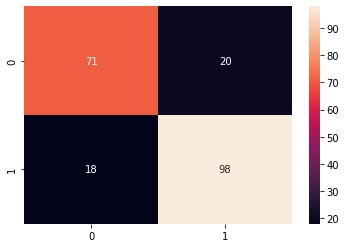

In [31]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [32]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
svm = SVC()
svm.fit(features, y_train)
y_pred = svm.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7432    0.6044    0.6667        91
           1     0.7293    0.8362    0.7791       116

    accuracy                         0.7343       207
   macro avg     0.7363    0.7203    0.7229       207
weighted avg     0.7354    0.7343    0.7297       207



In [33]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[55, 36],
       [19, 97]])

Confusion matrix test accuracy


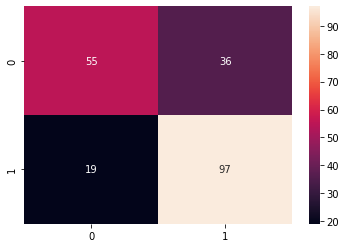

In [34]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(features, y_train)
y_pred = dt.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6531    0.7033    0.6772        91
           1     0.7523    0.7069    0.7289       116

    accuracy                         0.7053       207
   macro avg     0.7027    0.7051    0.7031       207
weighted avg     0.7087    0.7053    0.7062       207



In [36]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[64, 27],
       [34, 82]])

Confusion matrix test accuracy


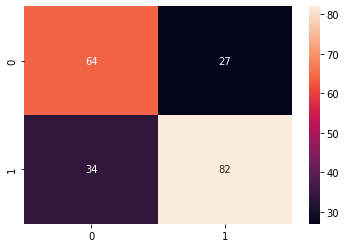

In [37]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [38]:
from sklearn.naive_bayes import GaussianNB
g=GaussianNB()
g.fit(features,y_train)
y_pred = g.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7083    0.3736    0.4892        91
           1     0.6415    0.8793    0.7418       116

    accuracy                         0.6570       207
   macro avg     0.6749    0.6265    0.6155       207
weighted avg     0.6709    0.6570    0.6308       207



In [39]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[ 34,  57],
       [ 14, 102]])

Confusion matrix test accuracy


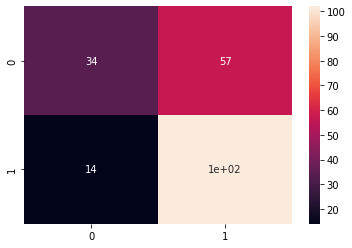

In [40]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=3)
clf3.fit(features, y_train)
y_pred = clf3.predict(features_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8085    0.8352    0.8216        91
           1     0.8673    0.8448    0.8559       116

    accuracy                         0.8406       207
   macro avg     0.8379    0.8400    0.8388       207
weighted avg     0.8414    0.8406    0.8408       207



In [42]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix test accuracy') 
confusion_matrix(y_test, y_pred)

Confusion matrix test accuracy


array([[76, 15],
       [18, 98]])

Confusion matrix test accuracy


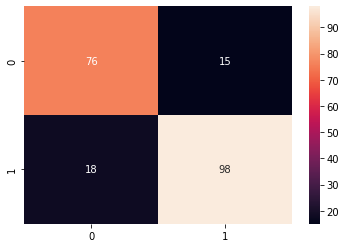

In [43]:
print('Confusion matrix test accuracy')
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True) 

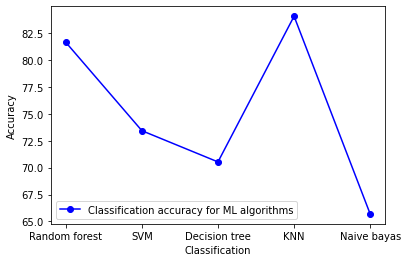

In [44]:
import matplotlib.pyplot as plt
classification=['Random forest','SVM','Decision tree','KNN','Naive bayas']
accuracy=[81.64,73.43,70.53,84.06,65.70]
plt.plot(classification,accuracy,'b-o',label='Classification accuracy for ML algorithms');
plt.xlabel('Classification')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

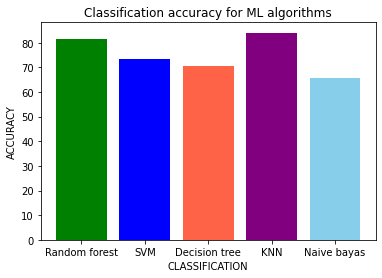

In [45]:
x=['Random forest','SVM','Decision tree','KNN','Naive bayas']
y =[81.64,73.43,70.53,84.06,65.70]
plt.bar(x,y, color=['green', 'blue', 'tomato', 'purple', 'skyblue'])
plt.xlabel('CLASSIFICATION')
plt.ylabel("ACCURACY")
plt.title('Classification accuracy for ML algorithms')
plt.show()